In [1]:
import os
import pandas as pd

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import PyMol
# You need to run "pymol -R" before
pymol = PyMol.MolViewer()
pymol.server.do('bg_color white')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import pylab as plot
params = {'legend.fontsize': 10}
plot.rcParams.update(params)

# Fasta sequence

NLYIQWLKDGGPSSGRPPPS

# Experimental structure

In [3]:
pymol.DeleteAll()
pymol.LoadFile(os.path.abspath('../1L2Y.pdb'), '1L2Y')
pymol.SetDisplayStyle('1L2Y', 'cartoon')

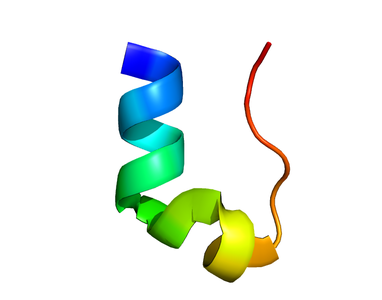

In [7]:
pymol.server.do('spectrum resi')
pymol.server.do('ray')
pymol.GetPNG(h=300)

# Initial structure

In [13]:
pymol.DeleteAll()
pymol.LoadFile(os.path.abspath('../1L2Y_P_h.pdb'), '1L2Y_P_h')
pymol.SetDisplayStyle('1L2Y_P_h', 'cartoon')

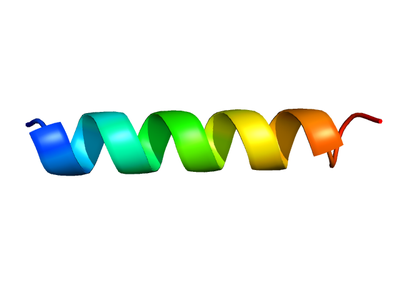

In [20]:
pymol.server.do('spectrum resi')
pymol.server.do('ray')
pymol.GetPNG(h=300)

# Simulation Temperature

In [3]:
simulation_temperature = 282
#simulation_temperature = 325

In [50]:
temperature = pd.read_fwf(
    'simulation_{}/summary.TEMP'.format(simulation_temperature), 
    colspecs=[(1, 12),(13, 23)], 
    index_col=0,
    names=["Time", "Temperature"]
)
temperature[:5]

,Temperature
Time,
0,11.20
1,12.17
2,157.20
3,232.09
4,291.41
5,323.08


In [51]:
temperature_avg = float(
    open('simulation_{}/summary_avg.TEMP'.format(simulation_temperature)).readline().split()[-1])

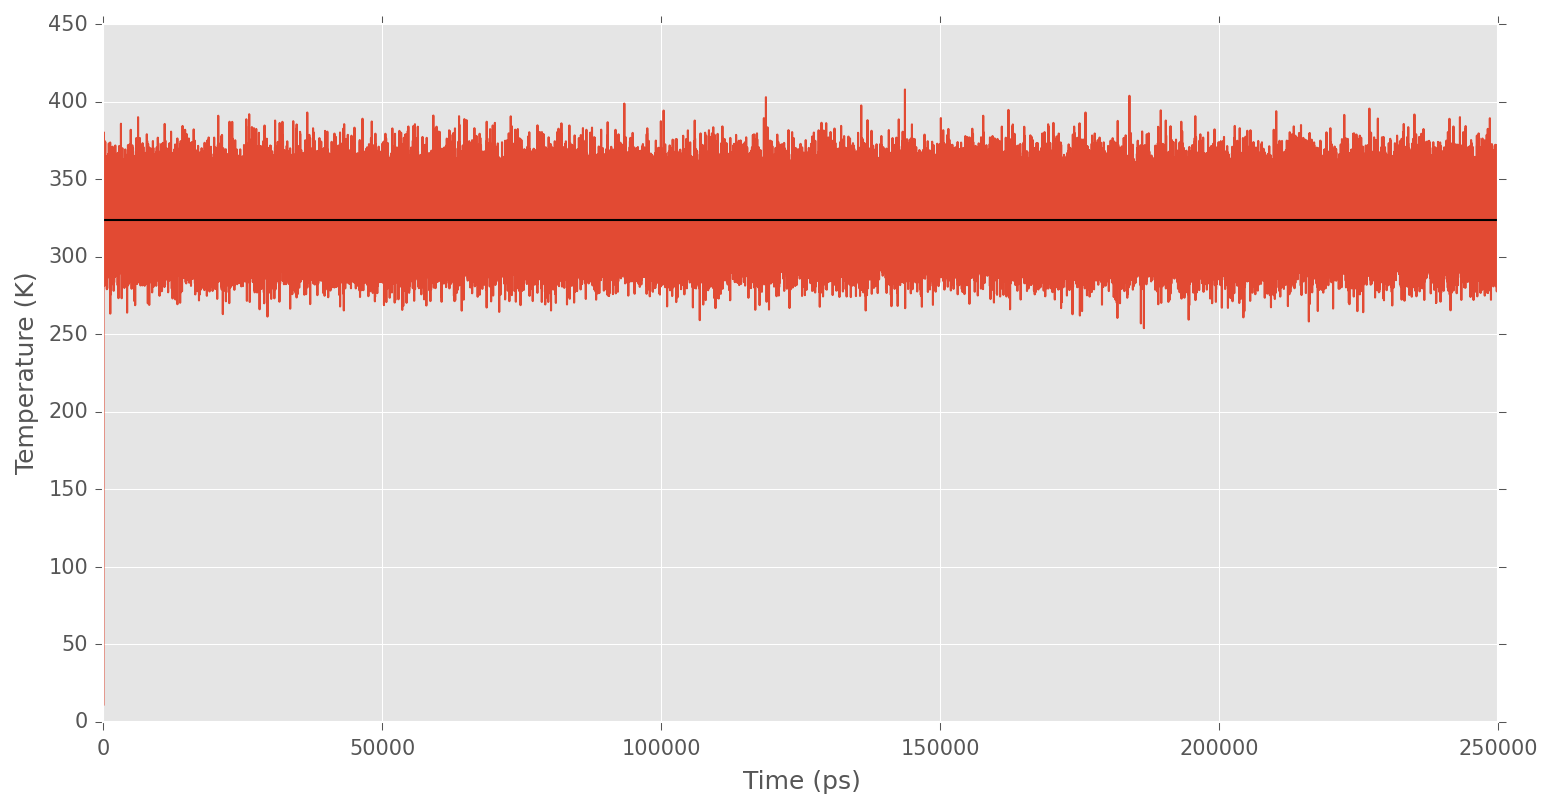

In [52]:
temperature.plot()
plt.axhline(temperature_avg, color="k")
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.legend().set_visible(False)

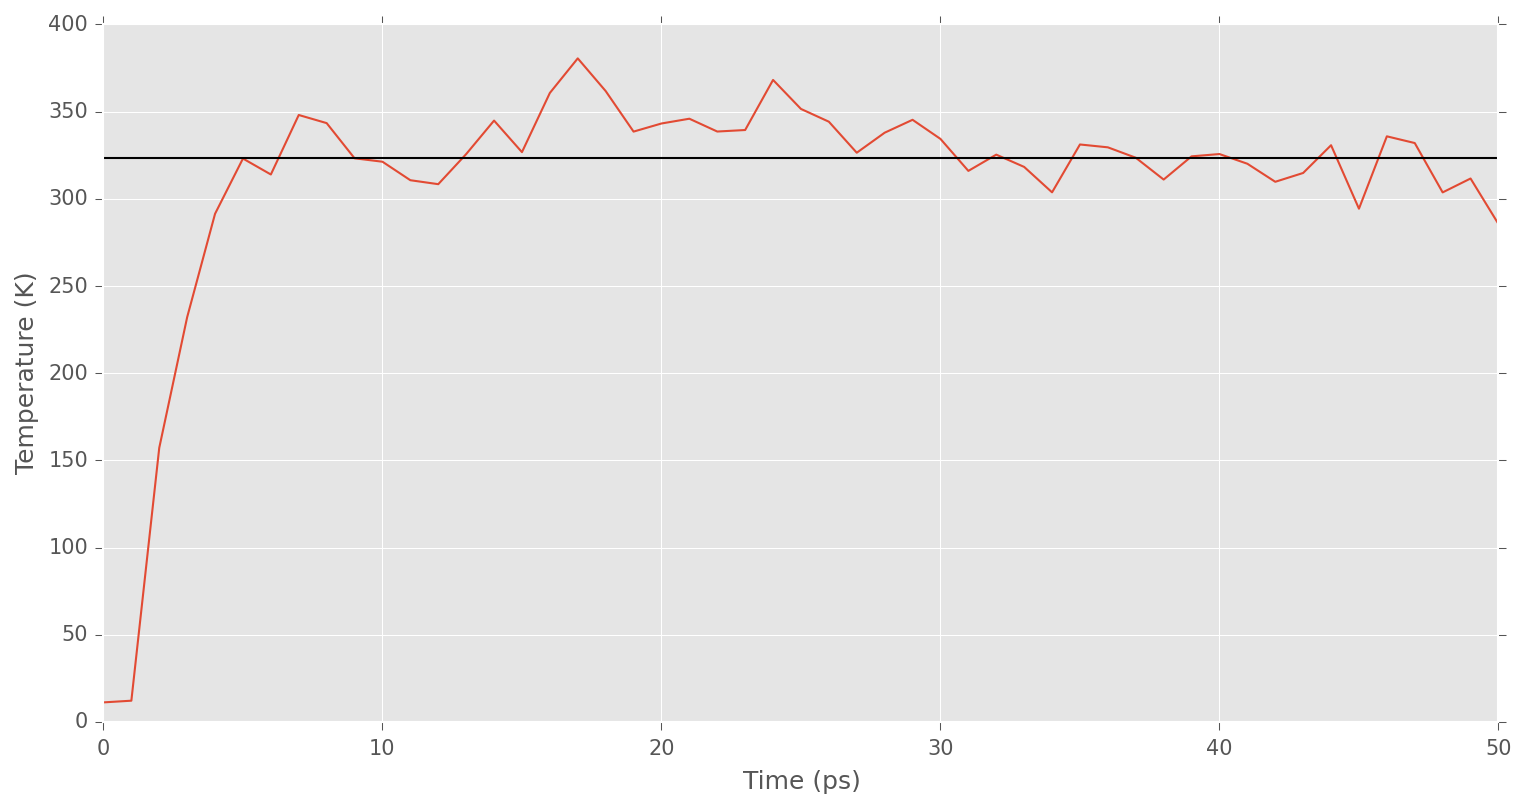

In [53]:
ax = temperature[:50].plot()
plt.axhline(temperature_avg, color="k")
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.legend().set_visible(False)

# Simulation Energy

In [9]:
etot = pd.read_fwf(
    'simulation_{}/summary.ETOT'.format(simulation_temperature),
    index_col=0,    
    colspecs=[(1, 12),(13, 29)], 
    names=['Time', 'Total Energy']
)
etot_avg = float(
    open('simulation_{}/summary_avg.ETOT'.format(simulation_temperature)).readline().split()[-1])

ektot = pd.read_fwf(
    'simulation_{}/summary.EKTOT'.format(simulation_temperature), 
    index_col=0,  
    colspecs=[(1, 12),(13, 29)], 
    names=['Time', 'Kinetic Energy']
)
ektot_avg = float(
    open('simulation_{}/summary_avg.EKTOT'.format(simulation_temperature)).readline().split()[-1])

eptot = pd.read_fwf(
    'simulation_{}/summary.EPTOT'.format(simulation_temperature), 
    index_col=0,  
    colspecs=[(1, 12),(13, 29)], 
    names=['Time', 'Potential Energy']
)
eptot_avg = float(
    open('simulation_{}/summary_avg.EPTOT'.format(simulation_temperature)).readline().split()[-1])

energy = etot.join(ektot).join(eptot)
print etot_avg, ektot_avg, eptot_avg
energy

-223.1925 210.9454 -434.1379


,Total Energy,Kinetic Energy,Potential Energy
Time,,,
0,-602.1373,8.4110,-610.5483
1,-601.6325,9.1438,-610.7763
2,-401.3721,101.4856,-502.8577
3,-285.1293,154.0621,-439.1914
4,-241.9356,181.8356,-423.7712
5,-206.0546,199.8273,-405.8819
6,-204.3457,206.7491,-411.0948
7,-177.5537,227.7027,-405.2564
8,-181.4903,226.3340,-407.8243


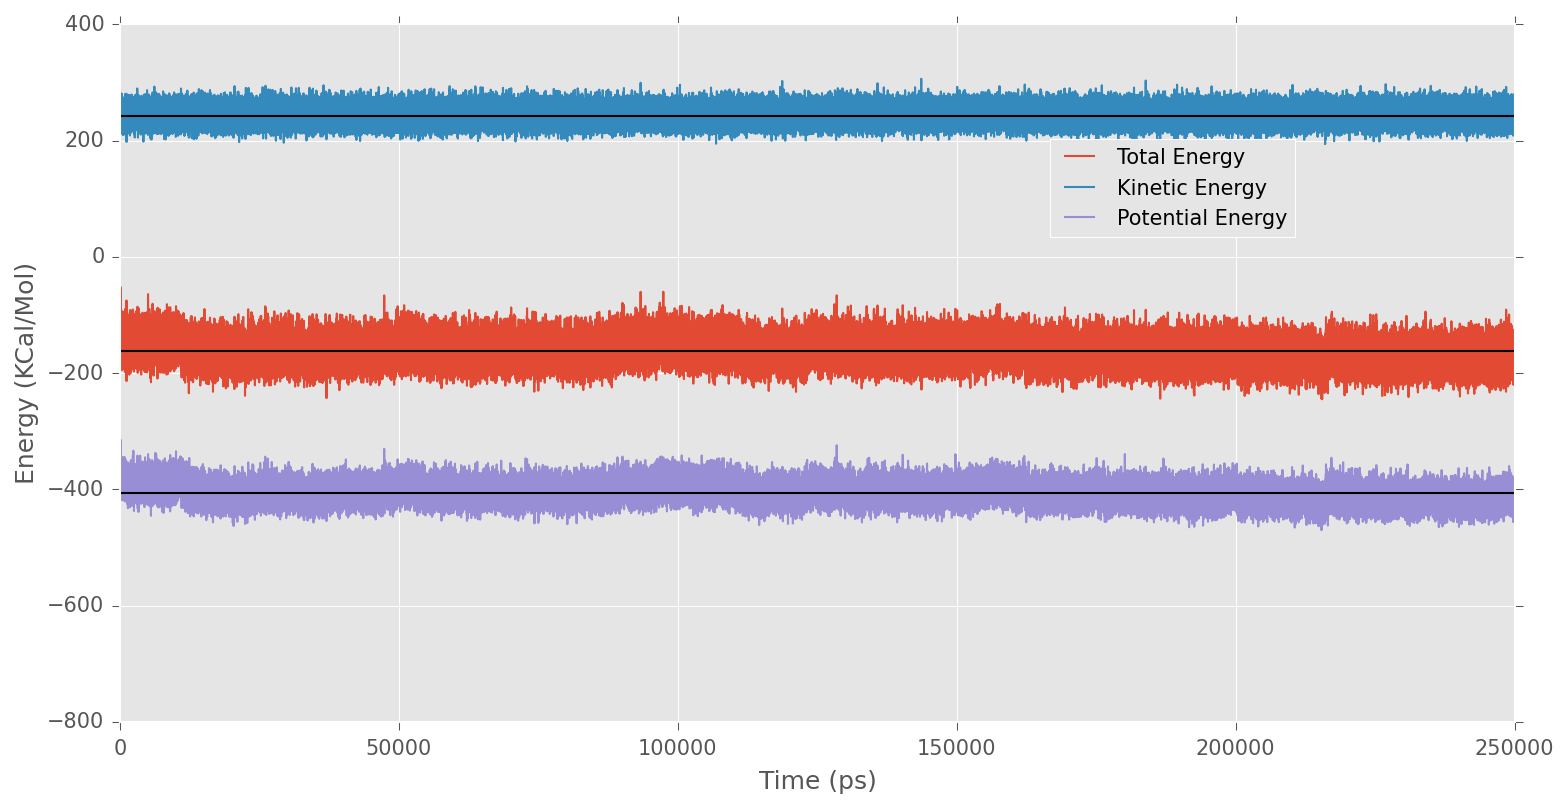

In [55]:
fig = energy.plot()
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
plt.axhline(etot_avg, color="k")
plt.axhline(ektot_avg, color="k")
plt.axhline(eptot_avg, color="k")
plt.xlabel("Time (ps)")
plt.ylabel("Energy (KCal/Mol)")

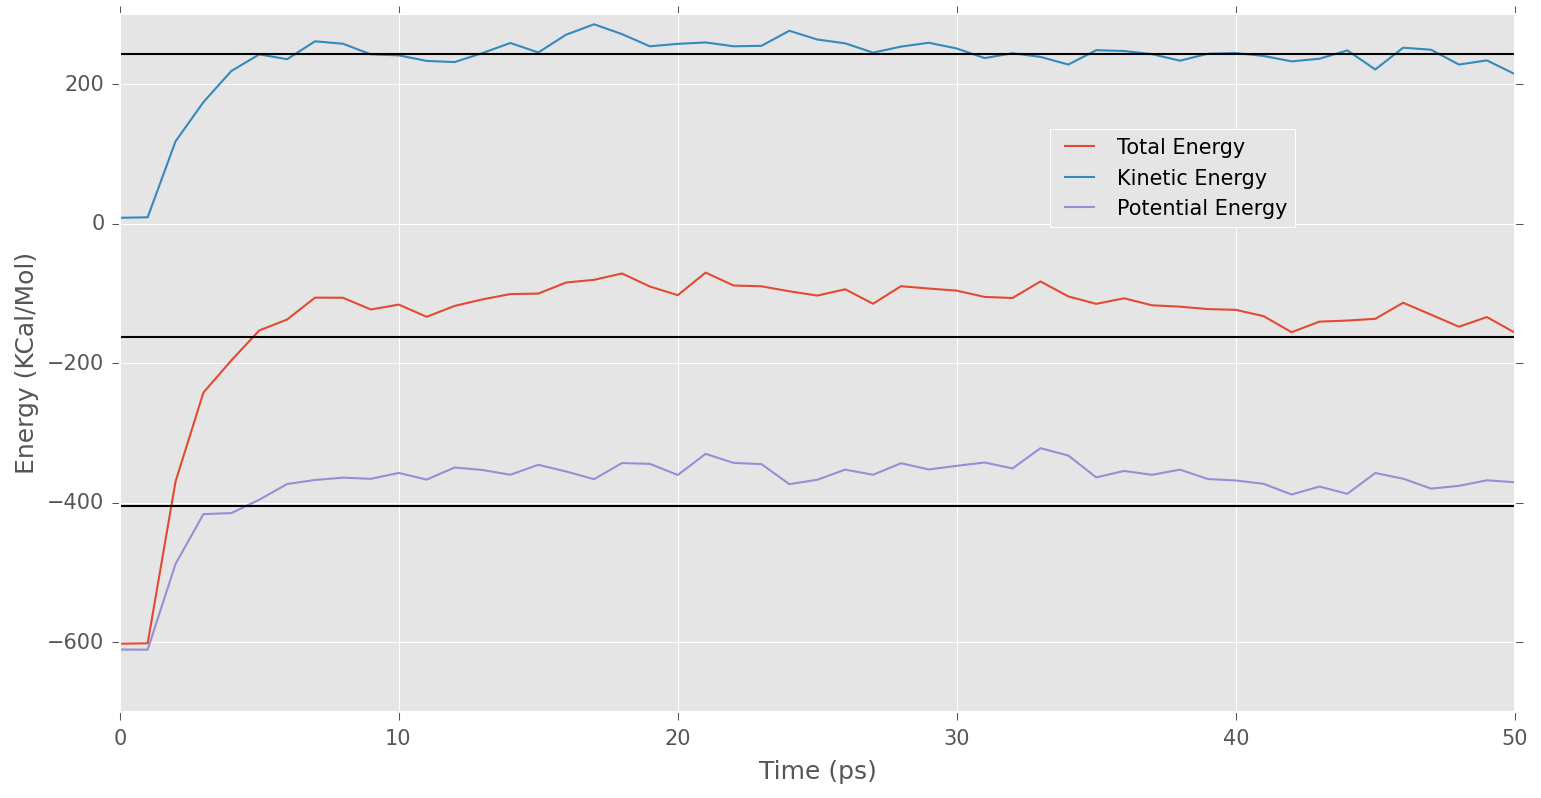

In [56]:
fig = energy[:50].plot()
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
plt.axhline(etot_avg, color="k")
plt.axhline(ektot_avg, color="k")
plt.axhline(eptot_avg, color="k")
plt.xlabel("Time (ps)")
plt.ylabel("Energy (KCal/Mol)")

##The total and potential energy plots show an initial decrease and then stabilise implying that our system has folded up to a state more stable than the starting linear structure.

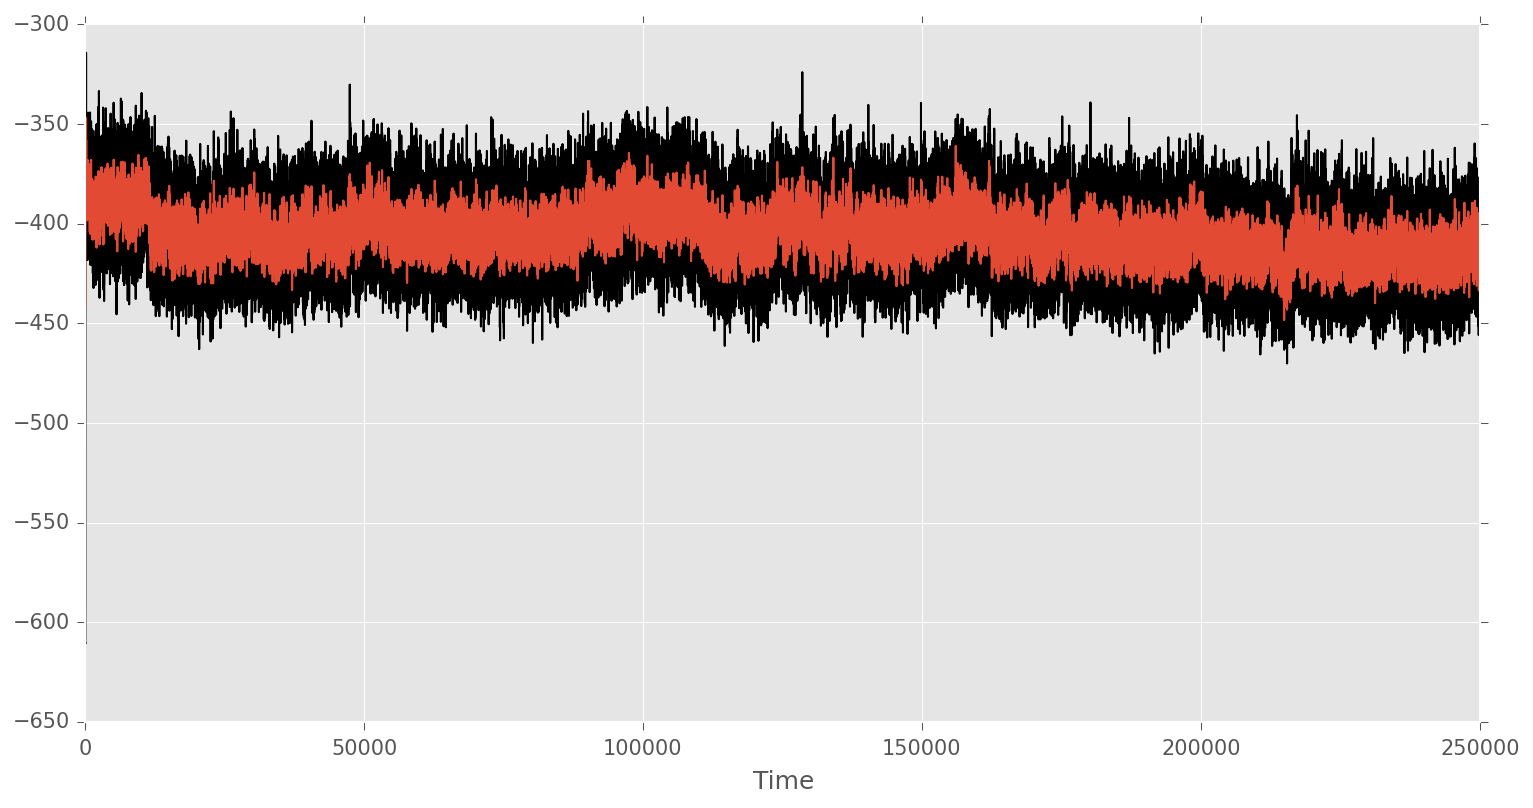

In [58]:
time=250000
energy['Potential Energy'][:time].plot(style='k')
pd.rolling_mean(energy['Potential Energy'][:time], window=10).plot()